In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
p="./IMG/center_2018_07_18_20_59_24_923.jpg"

In [3]:
#plt.imshow?
#cv2.flip?


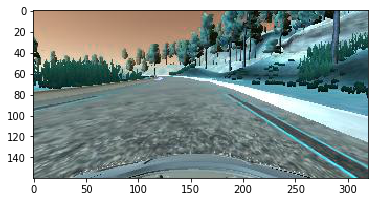

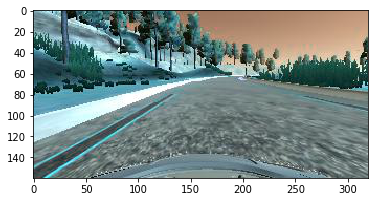

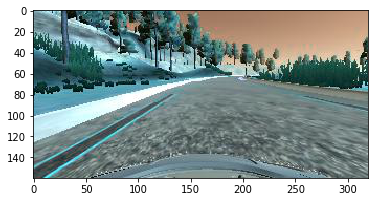

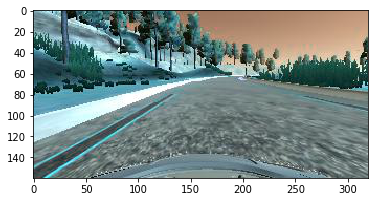

In [4]:
test=cv2.imread(p)
plt.imshow(test,aspect='equal')
plt.show()
test1=cv2.flip(test,1)
plt.imshow(test1,aspect='equal')
plt.show()
test2=cv2.flip(test,2)
plt.imshow(test2,aspect='equal')
plt.show()
test3=cv2.flip(test,3)
plt.imshow(test3,aspect='equal')
plt.show()

In [5]:
imgh,imgw,imgc=66,200,3 #image height weidth and channels

In [6]:
inputshape=(imgh,imgw,imgc)


In [7]:
def read_image(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return np.array(img)

In [8]:
def resize_image(img):
    new_img=cv2.resize(img,(imgw,imgh))
    return new_img

In [9]:
def crop_image(img):
    new_img=img[70:-25,:,:]
    return new_img

In [10]:
def process_img(path):
    img=read_image(path)
    img=crop_image(img)
    img=resize_image(img)

In [11]:
def process(image):
    img = crop_image(image)
    img = resize_image(img)
    return img

In [12]:
def choose_image(path_row,steering):
    ch=np.random.choice(3)
    img=process_img(path_row[ch])
    steering_angle=float(steering)
    #for left
    if (ch == 1):
        steering_angle += 0.2
    #for right
    if (ch == 2):
        steering_angle -= 0.2
    
    return img, steering_angle    

def flip_image(img, angle):
    ch = np.random.choice(2)
    if ch == 0:
        return img, angle
    else:
        return cv2.flip(img,1), -angle


In [13]:
def generate_dataset():
    
    ds=pd.read_csv('./driving_log.csv')
    dfx=ds[['C:\\Users\\Anuj_Chauhan\\Desktop\\Self_Driving_Car\\IMG\\center_2018_07_18_20_59_24_923.jpg','C:\\Users\\Anuj_Chauhan\\Desktop\\Self_Driving_Car\\IMG\\left_2018_07_18_20_59_24_923.jpg','C:\\Users\\Anuj_Chauhan\\Desktop\\Self_Driving_Car\\IMG\\right_2018_07_18_20_59_24_923.jpg']]
    #print(dfx.shape)
    dfy=ds[['0']]
    #print(dfy.shape)
    X=dfx.values
    Y = dfy.values
    
    data_X = np.empty( [X.shape[0], imgh, imgw,imgc],dtype='uint8' )
    data_Y = np.empty( [ Y.shape[0] ] )
    for i in range(X.shape[0]):

        img, angle = choose_image(X[i], Y[i])
        img, angle = flip_image(img, angle)

        data_X[i] = img
        data_Y[i] = angle
        
    return data_X, data_Y
    

In [14]:
ds=pd.read_csv('./driving_log.csv')
ds.head()

,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car\IMG\center_2018_07_18_20_59_24_923.jpg,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car\IMG\left_2018_07_18_20_59_24_923.jpg,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car\IMG\right_2018_07_18_20_59_24_923.jpg,0,1,0.1,30.19137
0,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,0.00,1.0,0,30.18999
1,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,0.00,1.0,0,30.19022
2,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,0.00,1.0,0,30.19027
3,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,-0.15,1.0,0,30.18459
4,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,C:\Users\Anuj_Chauhan\Desktop\Self_Driving_Car...,-0.30,1.0,0,30.16985
